# Data Science z Python 3.10. Optymalizator, funkcja straty i early stopping
## 🇬🇧 Data Science with Python 3.10. Optimizer, loss function and early stopping
#### 👨‍🏫 PhD Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

Poniżej przedstawiony jest kod znany z poprzednich zajęć. Tym razem wprowadzimy do niego "ulepszenia" i zastanowimy się nad właściwym optymalizatorem i funkcją straty. Wprowadzimy również do naszego modelu podstawowy Early Stopping, który będzie zapobiegać przeuczeniu się naszego modelu.

### 1. Import bibliotek
#### 🇬🇧 Import libraries
W tym miejscu importujemy biblioteki, które będą nam potrzebne do wytrenowania sieci neuronowej. Jeżeli w tym miejscu widoczny będzie błąd, to konieczne jest zainstalowanie biblioteki w danym środowisku. W takim wypadku wchodzimy w terminal, aktywujemy środowisko pracy, instalujemy biblioteki (pip install X).

In [ ]:
!pip install mnist

import tensorflow as tf
import numpy as np
import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import backend as K

# Rozpoczynamy od importu potrzebnych nam bibliotek, nowością jest EarlyStopping

### 2. Przygotowanie danych do analizy
#### 🇬🇧 Data preparation

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

Zatrzymajmy się na chwilę w tym miejscu. Na ostatnich zajęciach modyfikowaliśmy architekturę sieci neuronowej. Teraz przyszedł czas na wybór odpowiedniego optymalizatora, metryk oraz funkcji straty.

In [ ]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

### 3. Trenowanie modelu
#### 🇬🇧 Model training

### 📚 Zadanie 1.
##### Przeprowadź proces uczenia się z wykorzystaniem early stopping, wykonaj poniższe kroki.

1. Stwórz nową zmienną, którą nazwiesz f1, odwołaj się do early stopping, wprowadź odpowiednie wartości (takie jakie chcesz, tylko dla zmiennej patience wprowadź "10"), do parametrów takich jak monitor, mode, verbose oraz patience.
2. Stwórz nową zmienną, którą nazwiesz f2, odwołaj się do ModelCheckpoint, wprowadź nazwę dla swojego modelu oraz odpowiednie wartości dla parametru monitor, mode, verbose oraz save_best_only (znowu - takie jakie chcesz, poeksperymentuj z nimi 🔬).
3. Stwórz nową zmienną, którą nazwiesz history. Zmienna ta powinna zawierać stworzone w poprzednim kroku dane treningowe (x), etykiety danych trningowych (y), dane testowe (a), etykiey danych testowych (b) oraz odpowiednie wartości parametrów epochs oraz verbose.
4. Stwórz nową zmienną, którą nazwiesz trained_model, załaduj model używając nazwy modelu z punktu drugiego.
5. Stwórz nową zmienną, którą nazwiesz train_accuracy, odwołaj się do trained_model.evaluate, użyj danych treningowych (x) oraz etykiet danych treningowych (y).
6. Stwórz nową zmienną, którą nazwiesz test_accuracy, odwołaj się do trained_model.evaluate, użyj danych testowych (a) oraz etykiet danych testowych (b).
7. Przeprowadź uczenie sieci dla liczby epok wynoszącej 100. Po której epoce proces trenowania sieci się zatrzyma?
8. Wyświetl informacje dotyczące dokładności klasyfikacji na materiale treningowym oraz testowym.

In [ ]:

x = train_images
y = train_labels
a = test_images
b = test_labels
f1 = EarlyStopping( monitor='val_loss', mode='auto', verbose=0, patience=10)
f2 = ModelCheckpoint('model', monitor='val_loss', mode='auto', verbose=0, save_best_only=False)
history = model.fit(x, to_categorical(y), validation_data = (a, to_categorical(b)), epochs=100,callbacks = [f1,f2], verbose='auto')


In [ ]:
trained_model = load_model('model')
train_accuracy = trained_model.evaluate(x,to_categorical(y))
test_accuracy =  trained_model.evaluate(a,to_categorical(b))
print(train_accuracy + test_accuracy)

In [ ]:
# summarize history for loss 
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=100,
  batch_size=30,
)
print(train_accuracy + test_accuracy)

In [ ]:
trained_model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=100,
  batch_size=30,
)
print(train_accuracy + test_accuracy)

# Nowa sekcja

### 📚 Zadanie 2.
##### Uruchom ponownie proces treningu sieci, tym razem wprowadzając zmianę związaną z funkcją straty oraz optymalizatora.

1. Wypróbuj inną funkcję straty (rozkład Poisona). Czy w przypadku naszego zbioru danych taka funkcja ma sens?
2. Wypróbuj inny optymalizator (z wykorzystaniem algorytmu Adadelta). Czy obserwujesz jakieś zmiany w procesie uczenia się w porównaniu do algorytmu wykorzystanego w tutorialu (adam)? Gdzie może leżeć przyczyna tych różnic? (zob. https://keras.io/api/optimizers/adadelta).

## Funkcja straty Poissona

In [ ]:
model_poisson = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

model_poisson.compile(
  optimizer='adam',
  loss='Poisson',
  metrics=['accuracy'],
)

In [ ]:
x = train_images
y = train_labels
a = test_images
b = test_labels
f1 = EarlyStopping( monitor='val_loss', mode='auto', verbose=0, patience=10)
f2 = ModelCheckpoint('model_poisson', monitor='val_loss', mode='auto', verbose=0, save_best_only=False)
history = model_poisson.fit(x, to_categorical(y), validation_data = (a, to_categorical(b)), epochs=100,callbacks = [f1,f2], verbose='auto')

In [ ]:
trained_model = load_model('model_poisson')
train_accuracy = trained_model.evaluate(x,to_categorical(y))
test_accuracy =  trained_model.evaluate(a,to_categorical(b))
print(train_accuracy + test_accuracy)

In [ ]:
# summarize history for loss 
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Optymalizator Adadelta

In [ ]:
model_adadelta = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

model_adadelta.compile(
  optimizer='adadelta',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
x = train_images
y = train_labels
a = test_images
b = test_labels
f1 = EarlyStopping( monitor='val_loss', mode='auto', verbose=0, patience=10)
f2 = ModelCheckpoint('model_adadelta', monitor='val_loss', mode='auto', verbose=0, save_best_only=False)
history = model_adadelta.fit(x, to_categorical(y), validation_data = (a, to_categorical(b)), epochs=100,callbacks = [f1,f2], verbose='auto')

In [ ]:
trained_model = load_model('model_adadelta')
train_accuracy = trained_model.evaluate(x,to_categorical(y))
test_accuracy =  trained_model.evaluate(a,to_categorical(b))
print(train_accuracy + test_accuracy)

In [ ]:
# summarize history for loss 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



*   Model "model" przy zadanych parametrach zatrzymuje proces uczenia przy epoce nr 23 osiagajac 0.033, 0.989, 0.122, 0.973 (odpowiednio learning loss, learning accuracy, test loss, test accuracy)

*   "Model poisson": 0.103, 0.99, 0.112, 0.970, stop przy epoce nr 24

*   "Model Adadelta": 0.360, 0.900, 0.344, 0.903, stop przy epoce nr 100.
*   Widzimy podobne zachowanie sie modelu 'model' i 'poisson' na częsci testowej, stop przy podobnym nr epoki. 

*   "Model Adadelta" zachowuje sie podobnie w obu probach, uzyskuje znaczaco gorsze wyniki od pozotalych dwoch modeli. Krzywa straty jest wygladzona i niemal sie pokrywa.






### 📚 Zadanie 3.
##### Niekiedy przydaje nam się możliwość wprowadzenia modyfikacji do funkcji straty lub zbudowania własnej funkcji straty od postaw. W Keras/Tensorflow jest to dosyć prosta rzecz, którą możemy zrealizować za pomocą podstawowych operacji.

Poniższy przykład ilustruje w jaki sposób możemy skorzystać z funkcji straty Root Mean Square Error (RMSE) dla dwóch zmiennych (y_true i y_pred).

In [ ]:
y_true = 43.2
y_pred = 4.2

In [ ]:
x = tf.keras.metrics.RootMeanSquaredError()
x(y_true, y_pred).numpy()

Czasami jednak możemy chcieć stworzyć naszą własną funkcję straty (podajemy przy tym dwa argumenty, tj. y_true oraz y_pred).

In [ ]:
def custom_loss_function(y_true, y_pred):
  rmse = 0 
  n = 1
  rmse += ( (y_pred - y_true)**2 ) / n
  return np.sqrt(rmse)
    

In [ ]:
custom_loss_function(y_true,y_pred)

Odtwórz wskazaną wcześniej funkcję straty Root Mean Squared Error tworząc od podstaw nową funkcję.

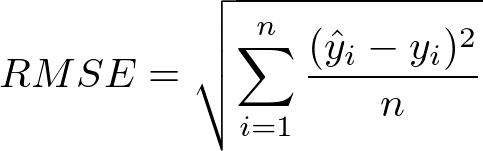